### Sriram Sunderrajan
### 220962444
### DL Lab - 4
### AIML - A2 (77)
### 28th January 2025
<br>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Question - 1

In [4]:
x = [[0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 0]

x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2, 1, bias=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
    
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx].to(device), self.y[idx].to(device)
    
mydata = MyDataset(x, y)
mydataloader = DataLoader(mydata, batch_size=4, shuffle=True)

model = Network().to(device)
model.train(True)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1)
num_epochs = 10000

losses = []

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for x_batch, y_batch in mydataloader:
        batch_size = len(x_batch)
        y_pred = model(x_batch)
        y_pred, y_batch = y_pred.reshape(batch_size,-1), y_batch.reshape(batch_size,-1)

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss
                
    if epoch%1000 == 0:
        losses.append(epoch_loss.detach().cpu())
        accuracy = accuracy_score(y_batch.detach().cpu().numpy(), np.where(y_pred.detach().cpu().numpy() > 0.5, 1, 0))
        print(f"Epoch {epoch}: Loss = {loss} | Accuracy = {accuracy * 100}%")
        
print(y_pred, y_batch)

Epoch 1000: Loss = 0.3469488024711609 | Accuracy = 75.0%
Epoch 2000: Loss = 0.3466601073741913 | Accuracy = 75.0%
Epoch 3000: Loss = 0.34662312269210815 | Accuracy = 75.0%
Epoch 4000: Loss = 0.3466220200061798 | Accuracy = 75.0%
Epoch 5000: Loss = 0.34660667181015015 | Accuracy = 75.0%
Epoch 6000: Loss = 0.346598744392395 | Accuracy = 75.0%
Epoch 7000: Loss = 0.34659379720687866 | Accuracy = 75.0%
Epoch 8000: Loss = 0.3466055393218994 | Accuracy = 75.0%
Epoch 9000: Loss = 0.34659451246261597 | Accuracy = 75.0%
Epoch 10000: Loss = 0.34658941626548767 | Accuracy = 75.0%
tensor([[5.0000e-01],
        [5.0000e-01],
        [9.9997e-01],
        [3.3872e-05]], device='cuda:0', grad_fn=<ViewBackward0>) tensor([[0.],
        [1.],
        [1.],
        [0.]], device='cuda:0')


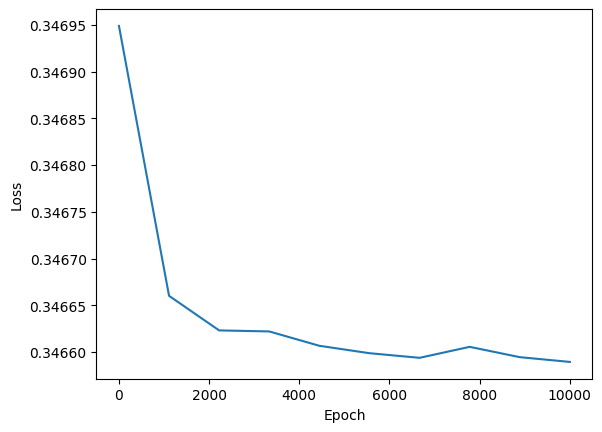

In [5]:
plt.plot(np.linspace(1, num_epochs, len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Questoin - 2

In [4]:
x = [[0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 0]

x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2, 1, bias=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.relu(x)
        return x
    
    
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx].to(device), self.y[idx].to(device)
    
mydata = MyDataset(x, y)
mydataloader = DataLoader(mydata, batch_size=4, shuffle=True)

model = Network().to(device)
model.train(True)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1)
num_epochs = 10000

losses = []

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for x_batch, y_batch in mydataloader:
        batch_size = len(x_batch)
        y_pred = model(x_batch)
        y_pred, y_batch = y_pred.reshape(batch_size,-1), y_batch.reshape(batch_size,-1)

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss
                
    if epoch%1000 == 0:
        losses.append(epoch_loss.detach().cpu())
        accuracy = accuracy_score(y_batch.detach().cpu().numpy(), np.where(y_pred.detach().cpu().numpy() > 0.5, 1, 0))
        print(f"Epoch {epoch}: Loss = {loss} | Accuracy = {accuracy * 100}%")
        
print(y_pred, y_batch)

Epoch 1000: Loss = 50.0 | Accuracy = 50.0%
Epoch 2000: Loss = 50.0 | Accuracy = 50.0%
Epoch 3000: Loss = 50.0 | Accuracy = 50.0%
Epoch 4000: Loss = 50.0 | Accuracy = 50.0%
Epoch 5000: Loss = 50.0 | Accuracy = 50.0%
Epoch 6000: Loss = 50.0 | Accuracy = 50.0%
Epoch 7000: Loss = 50.0 | Accuracy = 50.0%
Epoch 8000: Loss = 50.0 | Accuracy = 50.0%
Epoch 9000: Loss = 50.0 | Accuracy = 50.0%
Epoch 10000: Loss = 50.0 | Accuracy = 50.0%
tensor([[0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<ViewBackward0>) tensor([[0.],
        [1.],
        [1.],
        [0.]], device='cuda:0')


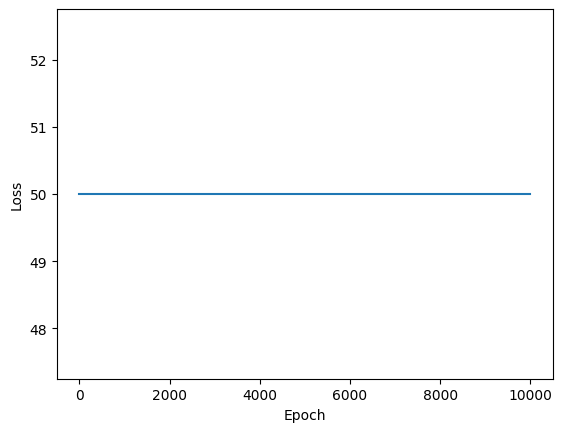

In [5]:
plt.plot(np.linspace(1, num_epochs, len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Question - 4

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms
import torch.nn.functional as F

In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 4
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [8]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

example_data.size()

torch.Size([4, 1, 28, 28])

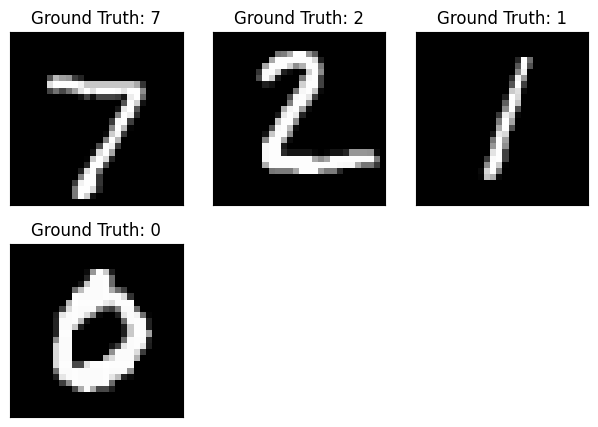

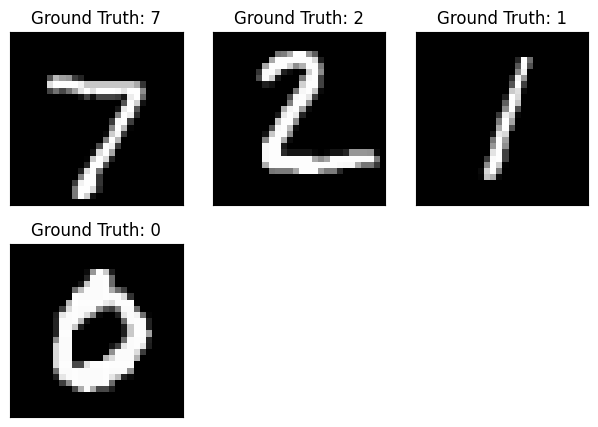

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(4):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [10]:
[i.size() for i,j in test_loader][0]

torch.Size([4, 1, 28, 28])

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class MNistNetwork(nn.Module):
    def __init__(self):
        super(MNistNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 256, bias=True)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 64, bias=True)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1, bias=True)
        # self.ac3 = None
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x
    


model = MNistNetwork().to(device)
model.train(True)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 1

In [14]:
losses = []

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        x_batch, y_batch = x_batch.view(batch_size,-1), y_batch.view(batch_size,-1)
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(batch_size,-1)
        y_batch = y_batch.type(torch.float)
        
        #print(x_batch) print(y_batch) print(y_pred)

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss
                
    if epoch%1 == 0:
        losses.append(epoch_loss.detach().cpu())
        accuracy = accuracy_score(y_batch.detach().cpu().numpy(), np.where(y_pred.detach().cpu().numpy() > 0.5, 1, 0))
        print(f"Epoch {epoch}: Loss = {epoch_loss} | Accuracy = {accuracy * 100}%")

Epoch 1: Loss = 10399.015625 | Accuracy = 25.0%
tensor([[0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<ViewBackward0>) tensor([[0.],
        [4.],
        [5.],
        [6.]], device='cuda:0')


In [15]:
model.eval()

losses = []
y_eval, y_preds = [], []


for x_batch, y_batch in test_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    x_batch, y_batch = x_batch.view(batch_size,-1), y_batch.view(batch_size,-1)
    y_pred = model(x_batch)
    y_pred = y_pred.reshape(batch_size,-1)
    
    y_eval += y_batch.detach().cpu().numpy().tolist()
    y_preds += y_pred.detach().cpu().numpy().tolist()

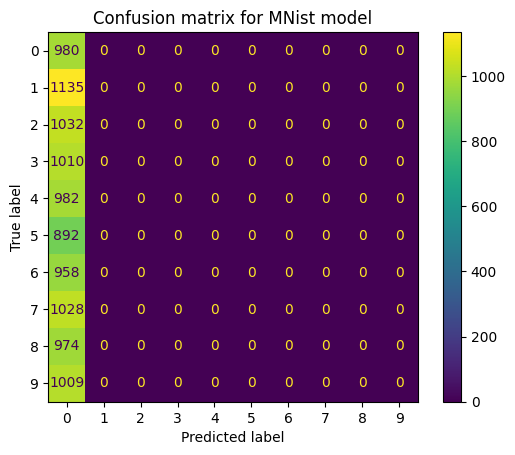

In [19]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_eval, y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()

plt.title("Confusion matrix for MNist model")
plt.show() 

## With CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

network = Net()
optimizer = optim.SGD(network.parameters(), lr=.1,
                      momentum=.5)

In [ ]:
n_epochs = 10
log_interval = 2000
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()